# Exploratory Data Analysis and Visualisations

In this notebook, the data is explored visually and analytically. In a series of histograms, boxplots and scatterplots, the relationships between the different variables - primarily the target variable (sales) and the remaining explanatory (independent) variables - are examined. 

The main reason for establishing relationships between sales and the independent variables is to ensure that the latter have a potential influence on sales. For instance, weekend days might have a higher impact on sales than regular workdays. If that is the case, then including that variable in the forecasting model will make for better predictions. 

Furthermore, examining explanatory variables amongst themselves might reveal multicollinearities. This is especially problematic for regression models because the model won't  know to which variable it should attribute the effect on sales. The result is most likely an inaccurate prediction.

Finally, examining histograms of the target variable reveals their distribution. A normal distribution is important for linear regression models, but plays less of a role in tree-based models. 

The relationships between variables are ultimately tested via:

* ANOVA tests (p-value) for continuous (target) and categorical (explanatory) variables
* Pearson Correlations when both variables are continuous

## Loading libraries and data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
%run functions_vis.py
%run functions_EDA.py

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
d = pd.read_csv("data/train_df.csv")

#### Converting "date" to datetime 

In [5]:
d['date'] = pd.to_datetime(d['date'])

## Visualizations

### Histograms of Daily Sales

The histograms below show the distribution of daily sales per year and per store. The graphs generally follow a Poisson distribution, meaning that there were many days with fewer sales and few days with high sales. This is generally not an issue for ensemble-based algorithms, such as random forests or gradient boosting models, but might pose a problem for a linear regression.

What is also apparent is the shift towards more frequent higher daily sales over the years. That is especially true for the stores that have been around for longer. This means that these stores tend to sell more items on a daily basis compared to the previous year. The time series linegraph below makes this more evident, showing an overall increase in daily sales over the years.

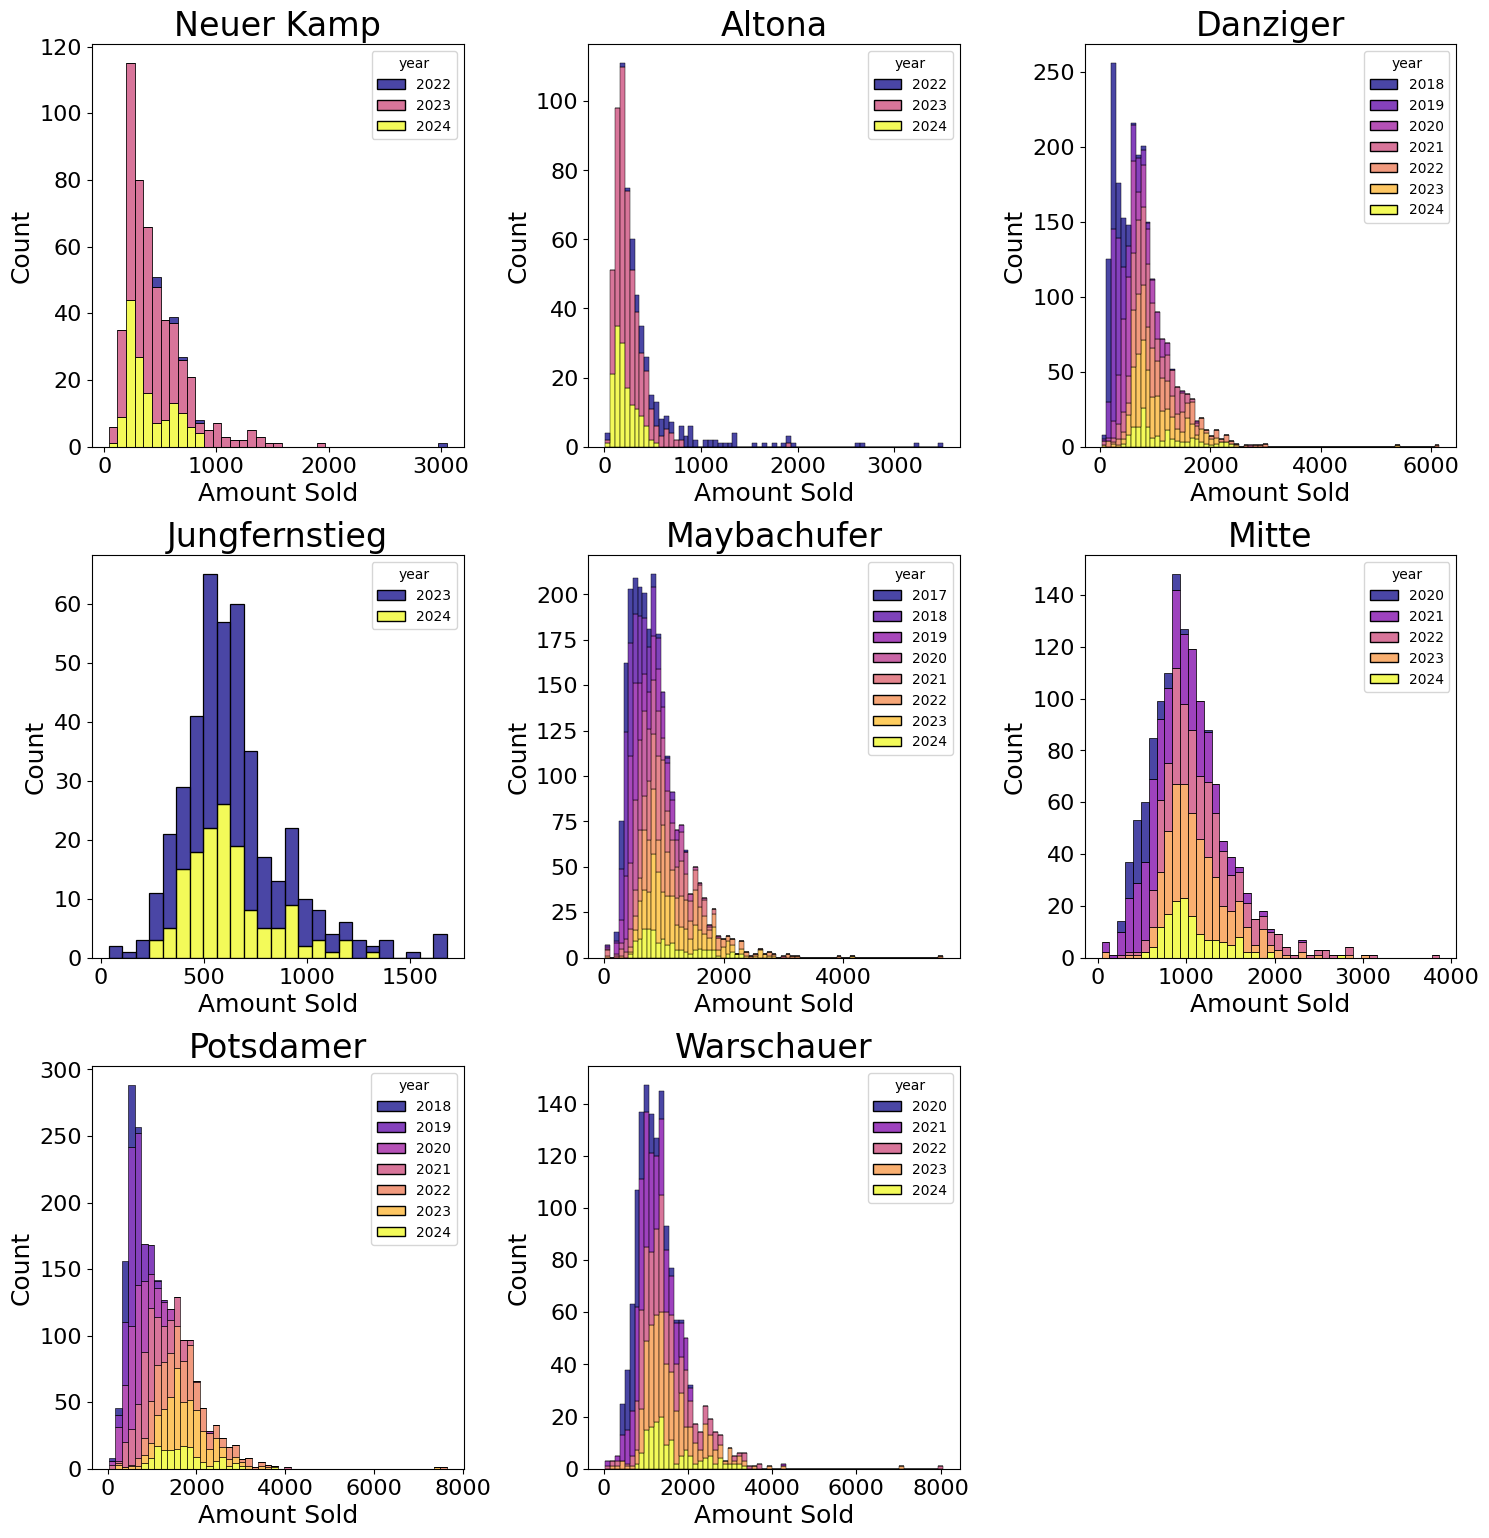

In [6]:
vis_total_amount_hist(d)

In [12]:
d[(d["item_category"] == "daily total")].groupby("store_name")["total_amount"].mean()

store_name
Altona            333.511667
Danziger          749.988933
Jungfernstieg     642.007177
Maybachufer       875.167339
Mitte            1022.347534
Neuer Kamp        447.756286
Potsdamer        1154.831798
Warschauer       1362.142361
Name: total_amount, dtype: float64

## Time series 

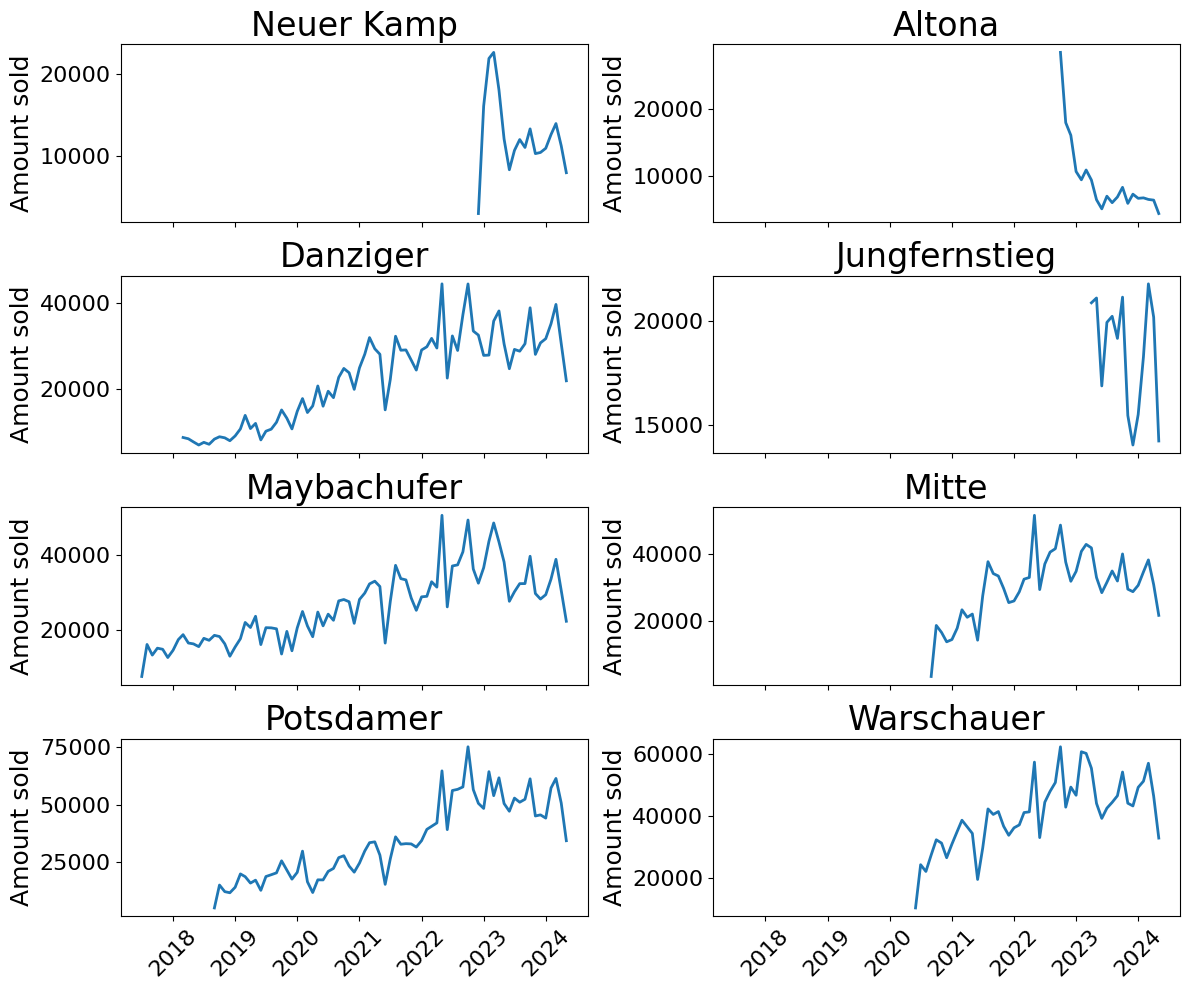

In [13]:
ts_lineplot(d)

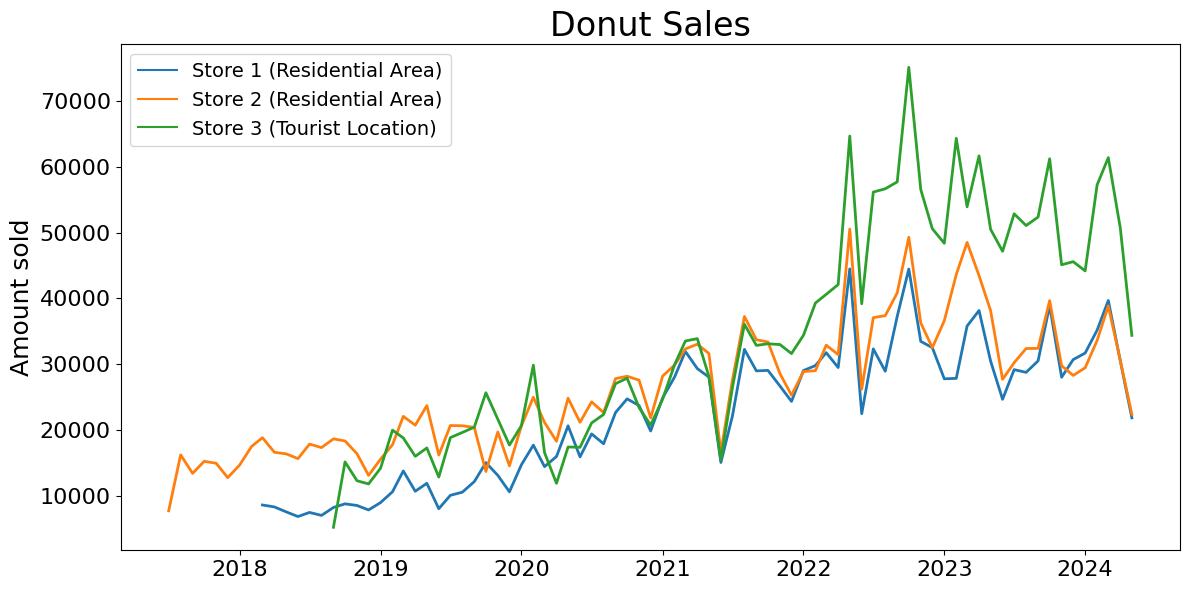

In [14]:
ts_lineplot_stacked(d)

# Branch 1 = Danziger
# Branch 2 = Maybachufer
# Branch 3 = Potsdamer

Disregrading some of the stores that haven't been open long enough, there is a clear upwards sales trend from year to year. Few more things are noticable in the graphs:

* The steady increase in sales continued during the COVID pandemic, but experienced a slump in the summer of 2021. After lockdown restrictions were loosened in early 2022, there seems to have been a stark increase in sales beginning early that year. By the end of the year, sales decreased almost across the board. This was presumably due to the "hype" toning down.

* Some seasonal trend are evident. Every summer, especially in 2021, saw a large decrease in sales. While the causes are not clear, it might be because of competing products, such as ice cream.

## Weather data

### Rainfall

In [ ]:
vis_rain(d)

In [ ]:
corr_total_amount_by_store(d, "precipitation_hours")

In [ ]:
vis_rain_bin(d)

In [ ]:
anova_pvalue(d, "rainfall_bins", "total_amount")

### Temperature

In [ ]:
vis_temp(d)

In [ ]:
corr_total_amount_by_store(d, "temperature_2m_mean")

In [ ]:
vis_temp_bin(d)

In [ ]:
d[d["item_category"] == "daily total"].groupby("temp_bins")["total_amount"].mean()

In [ ]:
anova_pvalue(d, "temp_bins", "total_amount")

In [ ]:
pd.Categorical(d['month'], categories=[range(1,13)], ordered=True)

In [ ]:
def temp_sales (df):
    fig, axes1 = plt.subplots(4,2, figsize = (12,15), sharey = True)
    axes1 = axes1.flatten()


    for i, store in enumerate(df["store_name"].unique()):
        store_df = df[df["store_name"] == store]

        # Sales

        sns.barplot(data = store_df, x = "month", y = "total_amount", errorbar=("ci",False),  color = "#3578FF", ax = axes1[i])

        axes1[i].set_title(store, size = 24)
        axes1[i].set_xlabel('')
        axes1[i].set_ylabel('Total Amount', size = 18)
        axes1[i].set_xticklabels(axes1[i].get_xticklabels(), rotation=45, size = 15)
        axes1[i].set_yticklabels(axes1[i].get_yticklabels(), size = 16)

        axes2 = axes1[i].twinx()

        # Temperature

        sns.lineplot(data = store_df, x = "month", y = "temperature_2m_mean", errorbar=("ci",False), color = "red", ax = axes2)

        axes2.set_ylabel('Temperature (°C)', size = 18)
        axes2.set_yticklabels(axes2.get_yticklabels(), size = 16)

    
    plt.tight_layout()

In [ ]:
temp_sales(d)

### Sunshine duration

In [ ]:
vis_sunshine(d)

In [ ]:
corr_total_amount_by_store(d, "sunshine_duration")

In [ ]:
vis_sunshine_bin(d)

In [ ]:
anova_pvalue(d, "sunshine_bins", "total_amount")

## Holidays

### Public holidays

In [ ]:
vis_pub_hol(d)

In [ ]:
anova_pvalue(d, "hol_pub", "total_amount")

### School holidays

In [ ]:
vis_school_hol(d)

In [ ]:
anova_pvalue(d, "hol_school", "total_amount")

## Public Spaces

In [ ]:
vis_pub_spaces(d)

## Time variables

### Weeks of the year

In [ ]:
vis_weeks(d)

In [ ]:
anova_pvalue(d, "week_year", "total_amount")

### Weekdays

In [ ]:
vis_weekday(d)

In [ ]:
anova_pvalue(d, "weekday", "total_amount")

### Weekend

In [ ]:
vis_weekend(d)

In [ ]:
anova_pvalue(d, "weekend", "total_amount")

In [ ]:
d.groupby(["store_name","date"])["total_amount"].sum()

## Item Categories Balance

In [ ]:
d['item_category'].value_counts().plot(kind='bar', color='skyblue')


# Add labels and title
plt.title('Amount of Data per Item Category')
plt.xlabel('Item Category')
plt.ylabel('Count')

# Show plot
plt.show()

In [ ]:
sns.boxplot(data = d, x = "item_category", y = "total_amount")

In [ ]:
d.groupby("item_category")["total_amount"].sum().sort_values(ascending=False).sum()

In [ ]:
d.groupby("item_category")["total_amount"].sum().sort_values(ascending=False)[-1] / d.groupby("item_category")["total_amount"].sum().sort_values(ascending=False).sum()